# Informe de Machine Learning.
## Cuadernos con árboles de decisión.
- Mauricio Munoz Gutierrez - 2123687
- Brayan Andres Sanchez Lozano - 2128974
- Jose Luis Hincapie Bucheli - XXXXXXXXXXX

## Configuración básica para el trabajo.

In [1]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import sklearn
import warnings

In [2]:
#Obtenemos los datos del csv
datos = pd.read_csv("./breastCancer.csv")

In [3]:
#Vista rapida de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   radius_worst             569 non-null    float64
 9   texture_worst            569 non-null    float64
 10  perimeter_worst          569 non-null    float64
 11  area_worst               569 non-null    float64
 12  smoothness_worst         569 non-null    float64
 13  compactness_worst        569 non-null    float64
 14  symmetry_worst           5

## Separación de datos para entrenamiento y pruebas

In [4]:
from sklearn.model_selection import train_test_split 
N=len(datos)
#Datos de entrenamiento
cTrain=int(N*0.8)

#Datos de pruebas
cTest=N-cTrain

#Contar cantidad de datos
print(N,cTrain,cTest)

train_data,test_data= sklearn.model_selection.train_test_split(datos, train_size=cTrain, test_size=cTest)

569 455 114


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 118 to 443
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              455 non-null    float64
 1   texture_mean             455 non-null    float64
 2   perimeter_mean           455 non-null    float64
 3   area_mean                455 non-null    float64
 4   smoothness_mean          455 non-null    float64
 5   compactness_mean         455 non-null    float64
 6   symmetry_mean            455 non-null    float64
 7   fractal_dimension_mean   455 non-null    float64
 8   radius_worst             455 non-null    float64
 9   texture_worst            455 non-null    float64
 10  perimeter_worst          455 non-null    float64
 11  area_worst               455 non-null    float64
 12  smoothness_worst         455 non-null    float64
 13  compactness_worst        455 non-null    float64
 14  symmetry_worst           455 

## Pipeline para atributos.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

num_attribs = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
               'compactness_mean','symmetry_mean','fractal_dimension_mean','radius_worst',
               'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
               'symmetry_worst', 'fractal_dimension_worst']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    ])

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs)])

In [7]:
x_train = full_pipeline.fit_transform(train_data)
y_train = train_data['diagnosis']

y_train

118    1
143    0
381    0
107    0
110    0
      ..
75     1
546    0
307    0
513    0
443    0
Name: diagnosis, Length: 455, dtype: int64

In [8]:
x_test = full_pipeline.transform(test_data)
y_test = test_data['diagnosis']

## Construcción de los Árboles de Decisión.

### Primer conjunto de árboles.

0

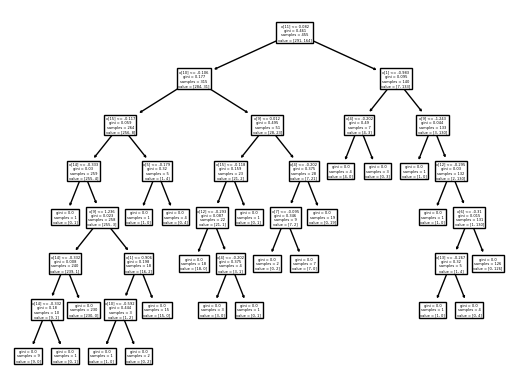

In [48]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelos1 = []

for i in range(1,11):
    modelo = tree.DecisionTreeClassifier(criterion='gini',max_depth=i,splitter="best",random_state=123)
    modelo.fit(x_train,y_train)
    scores = cross_val_score(modelo, x_train, y_train, cv=5,scoring='accuracy')
    modelos1.append(modelo)

tree.plot_tree(modelos[9])
0

In [20]:
from sklearn.metrics import accuracy_score

for i in range(0,10):
    y_pred = modelos1[i].predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"La precisión del árbol con profundidad {i+1} es: {accuracy}")

La precisión del árbol con profundidad 1 es: 0.9385964912280702
La precisión del árbol con profundidad 2 es: 0.9385964912280702
La precisión del árbol con profundidad 3 es: 0.9298245614035088
La precisión del árbol con profundidad 4 es: 0.956140350877193
La precisión del árbol con profundidad 5 es: 0.9298245614035088
La precisión del árbol con profundidad 6 es: 0.9385964912280702
La precisión del árbol con profundidad 7 es: 0.9736842105263158
La precisión del árbol con profundidad 8 es: 0.9736842105263158
La precisión del árbol con profundidad 9 es: 0.9736842105263158
La precisión del árbol con profundidad 10 es: 0.9736842105263158


Los resultados obtenidos para los árboles que tienen como hiperparámetros criterion=gini, splitter=best y random_state=123 son los siguientes:

| Max. Profundidad | Accuracy           |
| ------------ | ------------------ |
|      1       | 0.9385964912280702 |
|      2       | 0.9385964912280702 |
|      3       | 0.9298245614035088 |
|      4       | 0.956140350877193  |
|      5       | 0.9298245614035088 |
|      6       | 0.9736842105263158 |
|      7       | 0.9736842105263158 |
|      8       | 0.9736842105263158 |
|      9       | 0.9736842105263158 |
|     10       | 0.9736842105263158 | 

## Segundo Conjunto de Árboles.

0

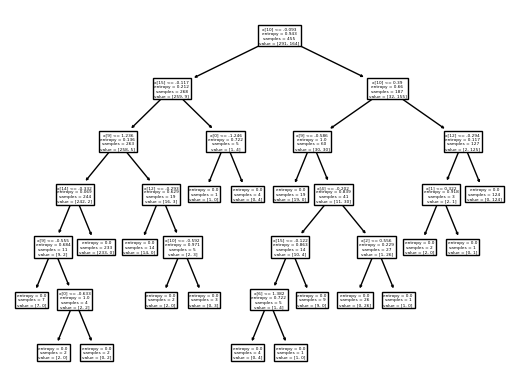

In [45]:
modelos2 = []

for i in range(1,11):
    modelo = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i,splitter="best",random_state=123)
    modelo.fit(x_train,y_train)
    scores = cross_val_score(modelo, x_train, y_train, cv=5,scoring='accuracy')
    modelos2.append(modelo)

tree.plot_tree(modelos2[9])
0

In [24]:
for i in range(0,10):
    y_pred = modelos2[i].predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"La precisión del árbol con profundidad {i+1} es: {accuracy}")

La precisión del árbol con profundidad 1 es: 0.8771929824561403
La precisión del árbol con profundidad 2 es: 0.9210526315789473
La precisión del árbol con profundidad 3 es: 0.8947368421052632
La precisión del árbol con profundidad 4 es: 0.9385964912280702
La precisión del árbol con profundidad 5 es: 0.9122807017543859
La precisión del árbol con profundidad 6 es: 0.9210526315789473
La precisión del árbol con profundidad 7 es: 0.9210526315789473
La precisión del árbol con profundidad 8 es: 0.9210526315789473
La precisión del árbol con profundidad 9 es: 0.9210526315789473
La precisión del árbol con profundidad 10 es: 0.9210526315789473


Los resultados obtenidos para los árboles que tienen como hiperparámetros criterion=etropy, splitter=best y random_state=123 son los siguientes:

| Max. Profundidad | Accuracy           |
| ------------ | ------------------ |
|      1       | 0.8771929824561403 |
|      2       | 0.9210526315789473 |
|      3       | 0.8947368421052632 |
|      4       | 0.9385964912280702 |
|      5       | 0.9122807017543859 |
|      6       | 0.9210526315789473 |
|      7       | 0.9210526315789473 |
|      8       | 0.9210526315789473 |
|      9       | 0.9210526315789473 |
|     10       | 0.9210526315789473 | 

## Tercer Conjunto de Árboles.

0

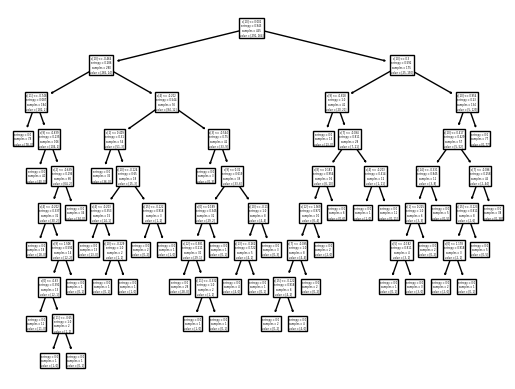

In [49]:
modelos3 = []

for i in range(1,11):
    modelo = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i,splitter="random",random_state=123)
    modelo.fit(x_train,y_train)
    scores = cross_val_score(modelo, x_train, y_train, cv=5,scoring='accuracy')
    modelos3.append(modelo)

tree.plot_tree(modelos3[9])
0

In [27]:
for i in range(0,10):
    y_pred = modelos3[i].predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"La precisión del árbol con profundidad {i+1} es: {accuracy}")

La precisión del árbol con profundidad 1 es: 0.9210526315789473
La precisión del árbol con profundidad 2 es: 0.9298245614035088
La precisión del árbol con profundidad 3 es: 0.9385964912280702
La precisión del árbol con profundidad 4 es: 0.9122807017543859
La precisión del árbol con profundidad 5 es: 0.9473684210526315
La precisión del árbol con profundidad 6 es: 0.9649122807017544
La precisión del árbol con profundidad 7 es: 0.9385964912280702
La precisión del árbol con profundidad 8 es: 0.9298245614035088
La precisión del árbol con profundidad 9 es: 0.9035087719298246
La precisión del árbol con profundidad 10 es: 0.9035087719298246


Los resultados obtenidos para los árboles que tienen como hiperparámetros criterion=etropy, splitter=random y random_state=123 son los siguientes:

| Max. Profundidad | Accuracy           |
| ------------ | ------------------ |
|      1       | 0.9210526315789473 |
|      2       | 0.9298245614035088 |
|      3       | 0.9385964912280702 |
|      4       | 0.9122807017543859 |
|      5       | 0.9473684210526315 |
|      6       | 0.9649122807017544 |
|      7       | 0.9385964912280702 |
|      8       | 0.9298245614035088 |
|      9       | 0.9035087719298246 |
|     10       | 0.9035087719298246 |

## Árboles con variación.

De momento, el árbol con el que se ha obtenido una mayor precisión es el siguiente:

| Max. Profundidad | criterion | splitter  | Accuracy           |
| ------------ | --------- | --------- | ------------------ |
|      6       |   gini    |   best    | 0.9736842105263158 |

Cabe resaltar que se obtuvieron los mismos resultados con el mismo tipo de árbol con profundidades 7,8,9 y 10. Para las variaciones se tomará el árbol de profundidad 6. El hiperparámetro a variar en esta ocasión será max_features. 

## Variación 1: max_features=0.5

0

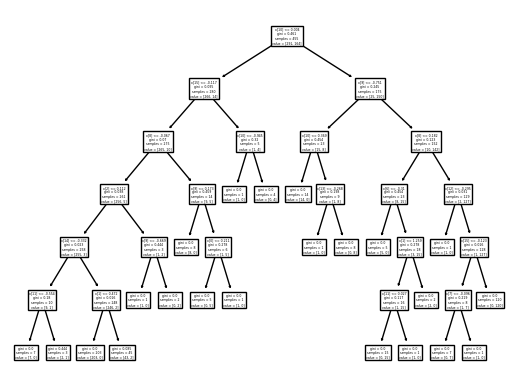

In [58]:
modeloV1 = tree.DecisionTreeClassifier(criterion='gini',max_depth=6,splitter="best",random_state=123,max_features=0.5)
modeloV1.fit(x_train,y_train)
scores = cross_val_score(modeloV1, x_train, y_train, cv=5,scoring='accuracy')

tree.plot_tree(modeloV1)
0

In [59]:
y_predV1 = modeloV1.predict(x_test)
accuracy_score(y_test, y_predV1)

0.9385964912280702

## Variación 2: max_features="log2"

0

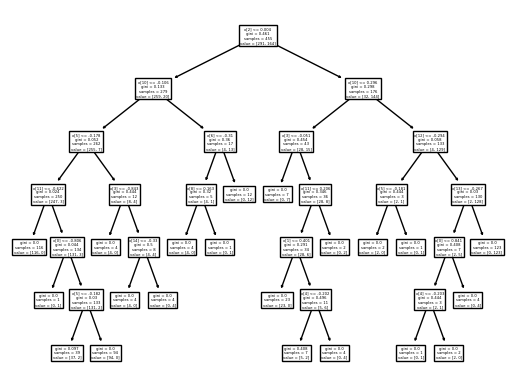

In [67]:
modeloV2 = tree.DecisionTreeClassifier(criterion='gini',max_depth=6,splitter="best",random_state=123,max_features="log2")
modeloV2.fit(x_train,y_train)
scores = cross_val_score(modeloV2, x_train, y_train, cv=5,scoring='accuracy')

tree.plot_tree(modeloV2)
0

In [68]:
y_predV2 = modeloV2.predict(x_test)
accuracy_score(y_test, y_predV2)

0.9649122807017544

Resumen de los resultados:

| Max. Profundidad | criterion | splitter  | max_features    |Accuracy           |
| ---------------- | --------- | --------- | --------------- |------------------ |
|      6           |   gini    |   best    | default (None)  |0.9736842105263158 |
|      6           |   gini    |   best    | float (0.5)     |0.9385964912280702 |
|      6           |   gini    |   best    | log2            |0.9649122807017544 |

Para ambas variaciones del árbol, el valor de precisión respecto al árbol original ha disminuido